# RFM - Recency Frequency Monetary

## Importing dataset

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel(r'Superstore.xls')

In [3]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2020-103800,2020-01-03,2020-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2020-112326,2020-01-04,2020-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2020-112326,2020-01-04,2020-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2020-112326,2020-01-04,2020-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2020-141817,2020-01-05,2020-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          10194 non-null  int64         
 1   Order ID        10194 non-null  object        
 2   Order Date      10194 non-null  datetime64[ns]
 3   Ship Date       10194 non-null  datetime64[ns]
 4   Ship Mode       10194 non-null  object        
 5   Customer ID     10194 non-null  object        
 6   Customer Name   10194 non-null  object        
 7   Segment         10194 non-null  object        
 8   Country/Region  10194 non-null  object        
 9   City            10194 non-null  object        
 10  State/Province  10194 non-null  object        
 11  Postal Code     10194 non-null  object        
 12  Region          10194 non-null  object        
 13  Product ID      10194 non-null  object        
 14  Category        10194 non-null  object        
 15  Su

In [5]:
df.describe()

,Row ID,Sales,Quantity,Discount,Profit
count,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000
mean,5097.500000,228.225854,3.791838,0.155385,28.673417
std,2942.898656,619.906839,2.228317,0.206249,232.465115
min,1.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2549.250000,17.220000,2.000000,0.000000,1.760800
50%,5097.500000,53.910000,3.000000,0.200000,8.690000
75%,7645.750000,209.500000,5.000000,0.200000,29.297925
max,10194.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State/Province', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

## Min & Max order date

In [7]:
df['Order Date'].min(), df['Order Date'].max()

(Timestamp('2020-01-03 00:00:00'), Timestamp('2023-12-30 00:00:00'))

## Recency of each customer ---

In [8]:
df_recency = df.groupby(by='Customer Name',as_index=False)['Order Date'].max()

# to show the recency of the cx as per the latest date 

df_recency.head()

,Customer Name,Order Date
0,Aaron Bergman,2022-11-10
1,Aaron Hawkins,2023-12-18
2,Aaron Smayling,2023-10-03
3,Adam Bellavance,2023-11-06
4,Adam Hart,2023-11-26


In [9]:
df_recency.columns = ['CustomerName', 'LastPurchaseDate']
df_recency.head()

,CustomerName,LastPurchaseDate
0,Aaron Bergman,2022-11-10
1,Aaron Hawkins,2023-12-18
2,Aaron Smayling,2023-10-03
3,Adam Bellavance,2023-11-06
4,Adam Hart,2023-11-26


In [10]:
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency']=df_recency['LastPurchaseDate'].apply(lambda x: (recent_date -x).days)

# substracting the date with recent date (max date)
df_recency.head()

,CustomerName,LastPurchaseDate,Recency
0,Aaron Bergman,2022-11-10,415
1,Aaron Hawkins,2023-12-18,12
2,Aaron Smayling,2023-10-03,88
3,Adam Bellavance,2023-11-06,54
4,Adam Hart,2023-11-26,34


In [11]:
recent_date =df_recency['LastPurchaseDate'].max()
recent_date

Timestamp('2023-12-30 00:00:00')

## Frequency of each customer

In [12]:
frequency_df = df.drop_duplicates()

In [13]:
frequency_df = df.groupby(
by=['Customer Name'], as_index=False)['Order Date'].count()

frequency_df.columns = ['CustomerName', 'Frequency']
frequency_df.head()

,CustomerName,Frequency
0,Aaron Bergman,6
1,Aaron Hawkins,11
2,Aaron Smayling,10
3,Adam Bellavance,18
4,Adam Hart,20


## Monetary value for each customer

In [17]:
df['Total'] = df['Sales']*df['Quantity']
monetary_df = df.groupby(by='Customer Name',as_index=False)['Total'].sum()
monetary_df.columns = ['CustomerName','Monetary']
monetary_df.head()

,CustomerName,Monetary
0,Aaron Bergman,1984.480
1,Aaron Hawkins,11459.552
2,Aaron Smayling,9088.880
3,Adam Bellavance,35390.580
4,Adam Hart,9664.265


## Creating an RFM dataframe

In [18]:
rf_df =df_recency.merge(frequency_df,on='CustomerName')
rfm_df =rf_df.merge(monetary_df,on='CustomerName').drop(columns='LastPurchaseDate')
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary
0,Aaron Bergman,415,6,1984.480
1,Aaron Hawkins,12,11,11459.552
2,Aaron Smayling,88,10,9088.880
3,Adam Bellavance,54,18,35390.580
4,Adam Hart,34,20,9664.265


## Ranking R F M individualy

In [19]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False) # recent days rank MORE
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)# freq data rank MORE
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)# monetary data rank MORE

rfm_df.head()

,CustomerName,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
0,Aaron Bergman,415,6,1984.480,71.5,103.5,87.0
1,Aaron Hawkins,12,11,11459.552,719.5,362.5,447.0
2,Aaron Smayling,88,10,9088.880,364.5,305.0,369.0
3,Adam Bellavance,54,18,35390.580,470.5,646.0,736.0
4,Adam Hart,34,20,9664.265,577.0,694.0,390.0


## NORMALIZING the rank of the customers

In [20]:
# making it to range of 0-100

rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100       #100 means newest & 0 means oldest
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100       # more the value -- the frequently brought
rfm_df['M_rank_norm'] = (rfm_df['M_rank']/rfm_df['M_rank'].max())*100       # more the value --the money spend more

rfm_df.head()

,CustomerName,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm
0,Aaron Bergman,415,6,1984.480,71.5,103.5,87.0,8.959900,12.9375,10.875
1,Aaron Hawkins,12,11,11459.552,719.5,362.5,447.0,90.162907,45.3125,55.875
2,Aaron Smayling,88,10,9088.880,364.5,305.0,369.0,45.676692,38.1250,46.125
3,Adam Bellavance,54,18,35390.580,470.5,646.0,736.0,58.959900,80.7500,92.000
4,Adam Hart,34,20,9664.265,577.0,694.0,390.0,72.305764,86.7500,48.750


In [21]:
# since data is normalized henced can drop the rank data

rfm_df.drop(columns=['R_rank', 'F_rank','M_rank'], inplace=True)

rfm_df.head()

,CustomerName,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,Aaron Bergman,415,6,1984.480,8.959900,12.9375,10.875
1,Aaron Hawkins,12,11,11459.552,90.162907,45.3125,55.875
2,Aaron Smayling,88,10,9088.880,45.676692,38.1250,46.125
3,Adam Bellavance,54,18,35390.580,58.959900,80.7500,92.000
4,Adam Hart,34,20,9664.265,72.305764,86.7500,48.750


## RFM Score

In [23]:
# weightages (Wt) are given as per company preferences

#---' \ ' is for next line (formula)

rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']

In [24]:
# score ranges from 0-100
rfm_df[['CustomerName', 'RFM_Score']].head()

,CustomerName,RFM_Score
0,Aaron Bergman,11.165235
1,Aaron Hawkins,58.060686
2,Aaron Smayling,43.817754
3,Adam Bellavance,83.893985
4,Adam Hart,62.923365


In [25]:
# To segregate in range to 0-5 (OLD-NEW)
rfm_df["RFM_Score"]*= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerName', 'RFM_Score']].head()

,CustomerName,RFM_Score
0,Aaron Bergman,0.56
1,Aaron Hawkins,2.90
2,Aaron Smayling,2.19
3,Adam Bellavance,4.19
4,Adam Hart,3.15


In [26]:
rfm_df['RFM_Score'].describe()

count    800.000000
mean       2.504175
std        1.185988
min        0.050000
25%        1.527500
50%        2.570000
75%        3.470000
max        4.820000
Name: RFM_Score, dtype: float64

## MAKING SEGMENTATION OF CUSTOMERS

**Rating Customer based upon the RFM Score**

* rfm score>4.5: **Top Customer**
* 4.5 > rfm score > 4 : **High Value Customer**
* 4>rfm score >3 : **Medium value Customer**
* 3>rfm score>1.5 : **Low value customer**
* rfm score<1.5 : **Lost customer**

In [27]:
rfm_df['Customer_segment'] =np.where(rfm_df['RFM_Score'] > 4.5,
                                    "Top Customers",
                                    (np.where(
                                    rfm_df['RFM_Score'] > 4,
                                    "High value Customer",
                                    (np.where(
                                    rfm_df['RFM_Score'] > 3,
                                    "Medium Value Customer",
                                    np.where(rfm_df['RFM_Score']> 1.5,
                                            "Low Value Customers","Lost Customers"))))))
rfm_df[['CustomerName','RFM_Score','Customer_segment']].head()

,CustomerName,RFM_Score,Customer_segment
0,Aaron Bergman,0.56,Lost Customers
1,Aaron Hawkins,2.90,Low Value Customers
2,Aaron Smayling,2.19,Low Value Customers
3,Adam Bellavance,4.19,High value Customer
4,Adam Hart,3.15,Medium Value Customer


## Visualization of Customer segmentation

In [28]:
#?rfm_df.plot

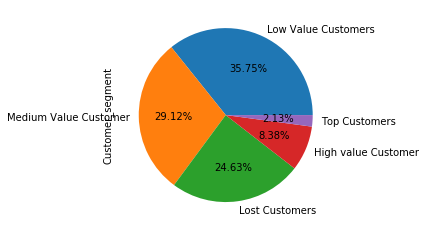

In [29]:
rfm_df['Customer_segment'].value_counts().plot(kind="pie",autopct="%1.2f%%");

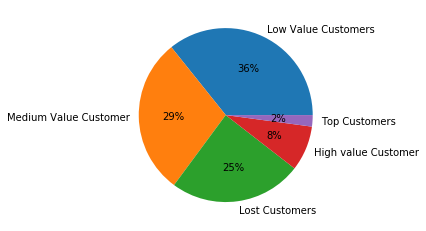

In [30]:
plt.pie(rfm_df.Customer_segment.value_counts(),
       labels=rfm_df.Customer_segment.value_counts().index,
       autopct="%.0f%%")
plt.show()

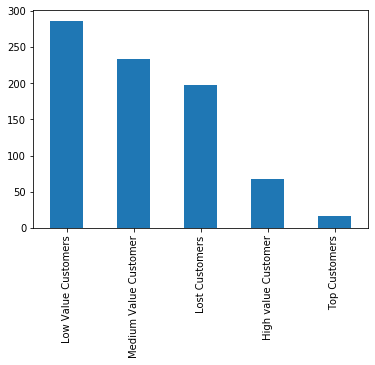

In [33]:
rfm_df['Customer_segment'].value_counts().plot(kind="bar");